# Part I - Exploring Loan Dataset from Prosper
## by (Ibuodinma Somtochukwu I)

## Introduction
### This data set contains various loans and certain charateristics that relates to the debtors.It is a dataset taken in a particular period in time. 
### Although it contains several variable (81 precisiely). 
### I intend to select some variables of interest and apply them to vizualization methods. 
### It is intended that productive insights will be generated from the dataset.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df_loan= pd.read_csv('prosperLoanData.csv') #importing the dataset into a pandas dataframe

In [3]:
df_loan.info()# checking the properties of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

### What is the structure of your dataset?

> My dataset has 113937 rows and  81 columns
> It comprises of 3 boolean variables, 50 floating type variables, 11 integer variables, 17 object/string

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest for me would be. They capture the fundamental variables that seem to affect the loan parameters.


Term

LoanStatus

BorrowerRate

BorrowerAPR

Employment Status

Home Owner or Not




### What features in the dataset do you think will help support your investigation into your feature(s) of interest?


LenderYield

IncomeRange

StatedMonthlyIncome

Recommendations

Investors


## Univariate Exploration

## 1. Which Term has the highest number of loan listing? 

In [4]:
df_loan.Term.value_counts() #the terms and number of listings

36    87778
60    24545
12     1614
Name: Term, dtype: int64

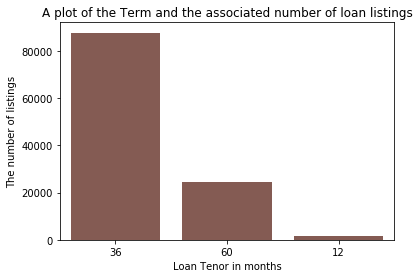

In [5]:
base_color= sb.color_palette()[5] #color selection
gen_order= df_loan.Term.value_counts().index # ordering my x values
sb.countplot(data=df_loan, x= 'Term',color=base_color,order= gen_order);# using countplot to 
plt.title('A plot of the Term and the associated number of loan listings') # title
plt.ylabel('The number of listings')# x-axis label
plt.xlabel('Loan Tenor in months');# y-axis label

### Summary: The plot above shows that the tenor of 36 months has more listings, seems more borrower are more interested this loan.

## 2. What is the distribution of the loan status, which status has more number?

In [6]:
df_loan.LoanStatus.value_counts()# checking the number of each loan status

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

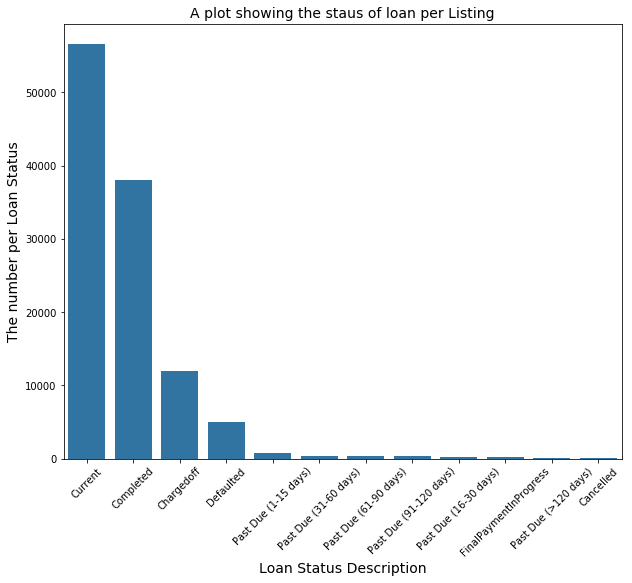

In [7]:
plt.figure(figsize=[10,8]);#Setting up figure size
base_color= sb.color_palette()[0] #color selection
gen_order= df_loan.LoanStatus.value_counts().index # ordering my x values
sb.countplot(data=df_loan, x= 'LoanStatus',color=base_color,order= gen_order);# using countplot 
plt.title('A plot showing the staus of loan per Listing',fontdict={'fontsize':14}) # title
plt.ylabel('The number per Loan Status',fontdict={'fontsize':14})# x-axis label
plt.xlabel('Loan Status Description',fontdict={'fontsize':14});# y-axis label
plt.xticks(rotation=45);

#### Summary: The first four status (current,completed,chargedoff,defaulted) has more number. More listings are current, many borrowers have competed their loan followed by chargedoff with fewer people defaulting.

## 3. Which range of Annual Percentage Rate has the highest distribution?

> Note The Annual Percentage Rate (APR) is the cost you pay each year to borrow money, including fees, expressed as a percentage.

*source:https://www.consumerfinance.gov/ask-cfpb/what-is-the-difference-between-an-interest-rate-and-the-annual-percentage-rate-apr-in-an-auto-loan-en*

In [8]:
df_loan.BorrowerAPR.describe()# summary stats of the column

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

Some Values are missing here. Let us check the entries with missing values

In [9]:
df_loan[df_loan.BorrowerAPR.isna()]# The rows without any BorrowerAPR

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
2543,044B3365298516680DA929B,36,2005-11-28 22:42:42.557000000,HR,36,Completed,2006-01-06 00:00:00,NaN,0.10000,0.0950,...,-4.02,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,5
14632,E4103364750435927B6F892,67,2006-01-06 12:54:51.887000000,AA,36,Completed,2006-04-10 00:00:00,NaN,0.06500,0.0550,...,-2.59,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,5
25166,B3083364738592238DBDA63,6,2005-11-15 16:06:47.457000000,AA,36,Completed,2005-11-29 00:00:00,NaN,0.04350,0.0385,...,-0.42,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,3
25330,B6C33364979883097BBCD77,39,2005-11-29 13:29:16.810000000,AA,36,Completed,2006-03-21 00:00:00,NaN,0.06395,0.0552,...,-1.30,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,4
29773,3480336511078238810A782,21,2005-11-18 14:48:19.753000000,AA,36,Completed,2008-06-05 00:00:00,NaN,0.06000,0.0550,...,-16.08,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,10
39870,B6E73366056348939D8801F,24,2005-11-20 14:45:55.193000000,C,36,Completed,2006-10-24 00:00:00,NaN,0.12000,0.1150,...,-53.96,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,6
43587,2F123364529418907A58D4C,19,2005-11-18 14:16:59.093000000,AA,36,Completed,2005-11-29 00:00:00,NaN,0.08500,0.0750,...,-1.10,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,6
62297,2F25336514614362295DA03,7,2005-11-15 18:25:56.107000000,E,36,Completed,2005-11-30 00:00:00,NaN,0.17000,0.1150,...,-0.42,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,1
71280,DED033645500376547AF34E,60,2005-12-29 19:53:41,C,36,Completed,2008-04-21 00:00:00,NaN,0.09000,0.0850,...,-74.98,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,8
71875,F50A33647261871547E3E0D,68,2006-01-06 13:05:50.890000000,AA,36,Completed,2006-07-11 00:00:00,NaN,0.07000,0.0650,...,-6.01,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,1


>  We observe that the BorrowerAPR column has 25 missing values and all fall under the term of 36 months. We can safely use the average value of BorrowerAPR for Term == 36 months to fill out the missing values

In [10]:
#finding the mean for Borrower Annual Percentage rate for the Term == 36 months
BorrowerAPR_mean= df_loan.BorrowerAPR[df_loan.Term== 36].mean()

In [11]:
df_loan.BorrowerAPR = df_loan.BorrowerAPR.fillna(BorrowerAPR_mean)#filling out the empty values with the average

In [12]:
df_loan.BorrowerAPR.describe()#summary stats

count    113937.000000
mean          0.218828
std           0.080355
min           0.006530
25%           0.156290
50%           0.209790
75%           0.283700
max           0.512290
Name: BorrowerAPR, dtype: float64

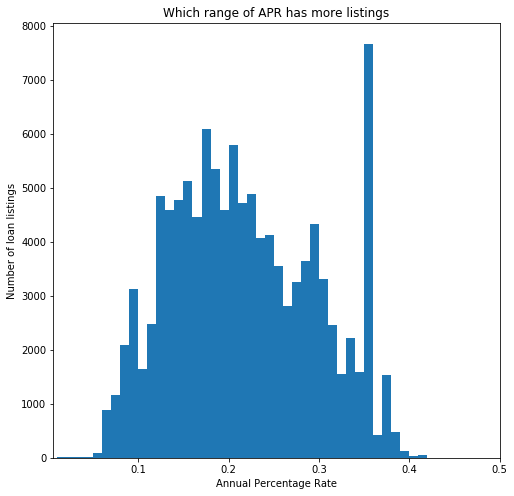

In [13]:
plt.figure(figsize=[8,8]);#setting up figure size
bins = np.arange(0,0.6, 0.01)# creating bins since the x-values are continous
plt.hist(data=df_loan, x = 'BorrowerAPR', bins = bins);# Using histogram to plot the distribution
plt.xlabel('Annual Percentage Rate')#labeling the x-axis
plt.ylabel('Number of loan listings')# Labeling the y-axis
plt.title('Which range of APR has more listings')#putting the title
plt.xlim([.006,0.5]);


#### Summary: There distribution approached normal distribution except for the high count between 0.35 and 0.4. Basically, most of the loans are within  APR ranging from 0.15-0.3 (15%-30%). We see an anomaly at 0.35-0.4. 

### 4.  How are the borrower distributed based on home ownership?

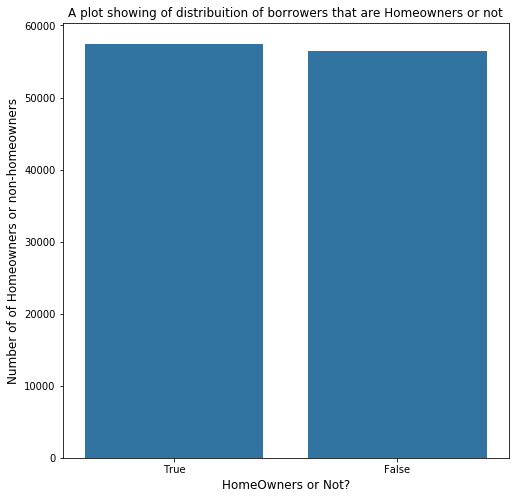

In [14]:
plt.figure(figsize=[8,8]);
base_color= sb.color_palette()[0] #color selection

sb.countplot(data=df_loan, x= 'IsBorrowerHomeowner',color=base_color, order=[ True, False]);# using countplot to 
plt.title('A plot showing of distribuition of borrowers that are Homeowners or not',fontdict={'fontsize':12}); # title
plt.xlabel('HomeOwners or Not?',fontdict={'fontsize':12});#labeling the x-axis
plt.ylabel('Number of of Homeowners or non-homeowners',fontdict={'fontsize':12});#labeling the y-axis

### Summary: There is not much observable significance in the distibution of this column. It seems home ownership does not have much impact of whether one will borrow or not

## 5. How are the various employment status distributed

In [15]:
df_loan.EmploymentStatus.unique()#unique employment status

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [16]:
df_loan[df_loan.EmploymentStatus.isnull()]# the rows without employment entry

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
39,109D3366077649289619396,24135,2006-07-11 17:14:14.647000000,B,36,Completed,2009-10-22 00:00:00,0.152110,0.1450,0.1400,...,-81.40,-299.78,0.00,0.00,0.00,1.0,0,0,0.0,44
92,0FE433661215082408720F0,22591,2006-07-02 11:05:02.857000000,AA,36,Completed,2007-03-01 00:00:00,0.082920,0.0755,0.0705,...,-6.73,0.00,0.00,0.00,0.00,1.0,0,0,0.0,21
146,34B03365511229087456DB5,31745,2006-08-16 09:43:10.867000000,A,36,Completed,2006-12-04 00:00:00,0.099390,0.0925,0.0850,...,-4.61,0.00,0.00,0.00,0.00,1.0,0,0,0.0,67
162,10463364871408702EBC041,17578,2006-06-03 07:46:36.343000000,AA,36,Completed,2007-01-09 00:00:00,0.084830,0.0780,0.0730,...,-6.60,0.00,0.00,0.00,0.00,1.0,0,0,0.0,93
193,0F6133644711535583E92C3,17091,2006-05-31 23:48:17.177000000,E,36,Defaulted,2007-10-08 00:00:00,0.239370,0.2300,0.2250,...,-8.71,0.00,1590.40,1584.56,0.00,1.0,0,0,0.0,13
206,2EB933650172111114C843E,3509,2006-03-25 13:09:11.680000000,D,36,Defaulted,2007-06-29 00:00:00,0.277670,0.2700,0.2575,...,-22.78,0.00,6022.51,6022.49,0.00,1.0,0,0,0.0,57
247,11E23365730062056F90FEB,24677,2006-07-14 12:32:33.113000000,E,36,Completed,2009-07-25 00:00:00,0.195820,0.1775,0.1725,...,-8.46,0.00,0.00,0.00,0.00,1.0,0,0,0.0,13
250,10113365475816471CE4D63,19135,2006-06-11 22:52:38.063000000,A,36,Completed,2006-11-03 00:00:00,0.088570,0.0800,0.0750,...,-2.53,0.00,0.00,0.00,0.00,1.0,0,0,0.0,74
310,09153364358698231A8518D,21076,2006-06-22 04:42:40.490000000,D,36,Completed,2009-07-03 00:00:00,0.127240,0.1175,0.1125,...,-14.77,0.00,0.00,0.00,0.00,1.0,0,0,0.0,27
325,08C6336434277036891A872,16734,2006-05-30 13:49:06.213000000,B,36,Completed,2008-05-01 00:00:00,0.134530,0.1275,0.1175,...,-41.85,-111.30,0.00,0.00,0.00,1.0,0,0,0.0,128


The rows with missing values are still valid because some borrowers completed and and defaulted, hence they cannot be dropped. Hence we fill the missing values with 'Not Available'

In [17]:
df_loan.EmploymentStatus = df_loan.EmploymentStatus.fillna('Not available')# populatinf the non available cells

In [18]:
df_loan.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Not available     7602
Self-employed     6134
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

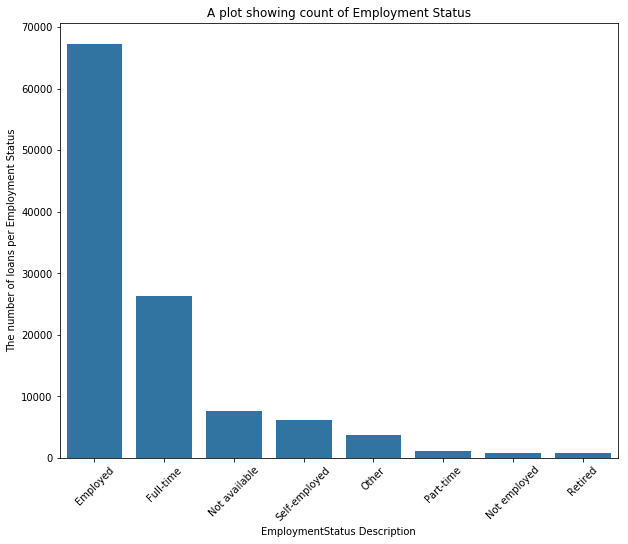

In [19]:
plt.figure(figsize=[10,8]);# setting up the figure size
base_color= sb.color_palette()[0] #color selection
gen_order= df_loan.EmploymentStatus.value_counts().index # ordering my x values
sb.countplot(data=df_loan, x= 'EmploymentStatus',color=base_color,order= gen_order);# using countplot to 
plt.title('A plot showing count of Employment Status') # title
plt.ylabel('The number of loans per Employment Status')# x-axis label
plt.xlabel('EmploymentStatus Description');# y-axis label
plt.xticks(rotation=45);# properly aligning the xticks

#### Summary: We have more Employed and full-time workers taking loans

## 6. The distribution of interest rates for the loans.

In [20]:
df_loan.BorrowerRate.describe() # checking the basic statistics of the column

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

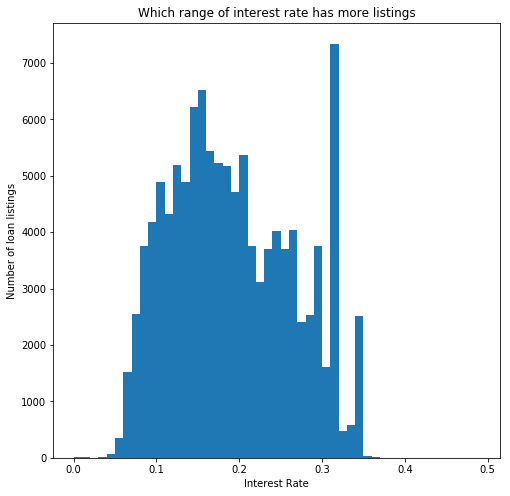

In [21]:
plt.figure(figsize=[8,8]);#setting up figure size
bins = np.arange(0,0.5, 0.01)# creating bins since the x-values are continous
plt.hist(data=df_loan, x = 'BorrowerRate', bins = bins);# Using histogram to plot the distribution
plt.xlabel('Interest Rate')#labeling the x-axis
plt.ylabel('Number of loan listings')# Labeling the y-axis
plt.title('Which range of interest rate has more listings');#putting the title
# plt.xlim([.006,0.5]);

#### Summary: There distribution approached normal distribution except for the high count between 0.3 and 0.35. Basically, most of the loans are within  interest rate ranging from 0.10-0.25 (10%-25%). We see an anomaly at 0.35-0.4. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>  I am interested in the following variables and how they affect the various loans listed. They are

>Term: The distibution of this variable is skewed to the left. Although, the variable is numerical, its discrete nature imposes category on it, making it amenable to be analysed as a categorical variable.

>LoanStatus: Thus is purely a categorical variable, it is skewed to the left. Most borrowers are owing or have paid up their loans. No unusual points observed.

>BorrowerRate: There distribution approached normal distribution except for the high count between 0.3 and 0.35. Basically, most of the loans are within  interest rate ranging from 0.10-0.25 (10%-25%). We see an anomaly at 0.35-0.4. Why? With bivariate or multivariate plots we will discern what happened as we compare with other variables.

>BorrowerAPR: There distribution approached normal distribution except for the high count between 0.35 and 0.4. Basically, most of the loans are within  APR ranging from 0.15-0.3 (15%-30%). We see an anomaly at 0.35-0.4. Why? We bivariate or multivariate plots we will discern what happened as we compare with other variables.

>EmploymentStatus: We have more Employed and full-time workers taking loans

>IsBorrowerHomeowner:There is not much observable significance in the distibution of this column. It seems home ownership does not have much impact of whether one will borrow or not


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, for Employment status some entries did not indicate their status. These entries were valid borrowers since most of their loan status showed completed. So we simply filled the empty cells with 'Not available'

> For annual percentage rate, we found 25 missing values and all fall under the tenor of 36 months. So I used the mean of all the APR for a tenor of 36 months to fill out the empty cells

## Bivariate Exploration


## 1. How is loan Status affected by Annual Percentage rate

To investigate thus we employ the use of boxplot

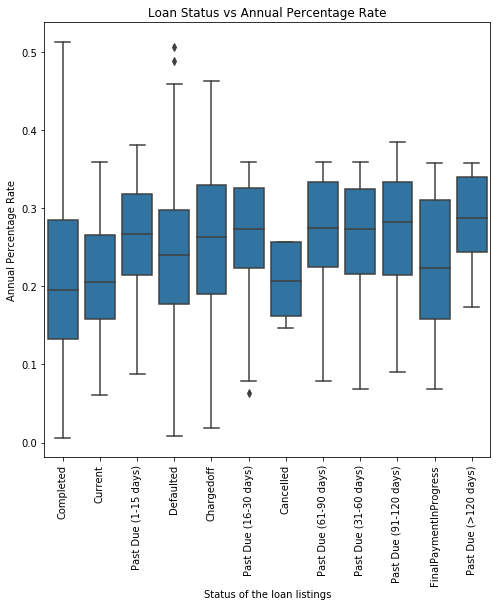

In [22]:
plt.figure(figsize=[8,8]);
base_color= sb.color_palette()[0];#setting up color
sb.boxplot(data= df_loan, x= 'LoanStatus',y= 'BorrowerAPR',color=base_color);#plotting the boxplot
plt.title('Loan Status vs Annual Percentage Rate');#putting the title
plt.xlabel('Status of the loan listings');#Labeling the x-axis
plt.ylabel('Annual Percentage Rate');#Labeling the y-axis
plt.xticks(rotation=90);#rotating the ticks for clarity

>Borrowers who have completed their loans had the highest annual rate followed by those who defaulted. The completed loans has the list median and most of the rates are within the interquatile range (The completed loans seem to have favourable rates between the lowest and the upper quartile, the maximum not withstanding- could it be a reaseon for the borrowers paying up.

> The defaulted registered a narrower range and a higher median, suggesting higher rates than those that are completed. further, the current loans seem promising as the rates are more lesser for most of its data points.

## 2. How is loan Status affected by interest rate

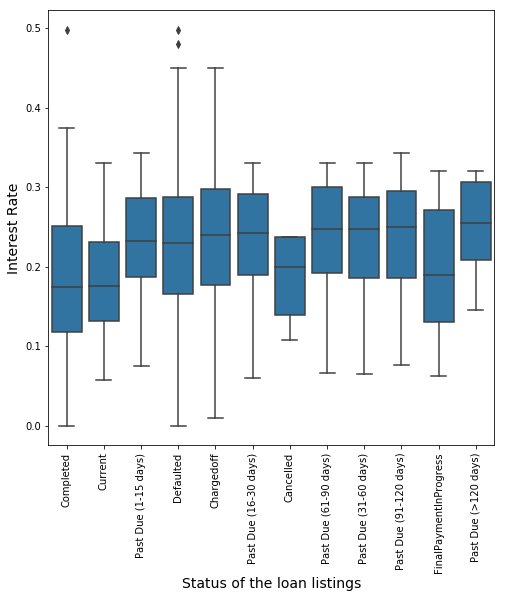

In [23]:
plt.figure(figsize=[8,8]);
base_color= sb.color_palette()[0];#setting up color
sb.boxplot(data= df_loan, x= 'LoanStatus',y= 'BorrowerRate',color=base_color);#plotting the boxplot
plt.xlabel('Status of the loan listings',fontdict= {'fontsize':14});#Labeling the x-axis
plt.ylabel('Interest Rate',fontdict= {'fontsize':14});#Labeling the y-axis
plt.xticks(rotation=90);#rotating the ticks for clarity


The defaulted and charged off loans show a significantly high rates, suggesting a possible reason for the failures to payback. The Current and Completed loans show more points within the IQR. The completed loans mostly so because we see rates as low as zero a possible incentive to borrow.

## 3. Is there any relationship between Annual Percentage and Interest Rate

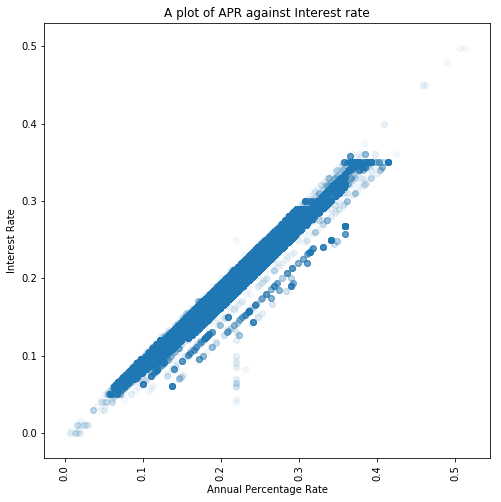

In [24]:
plt.figure(figsize=(8,8));
base_color= sb.color_palette()[0];#setting up color
plt.scatter(data= df_loan, x= 'BorrowerAPR',y= 'BorrowerRate',color=base_color,alpha= 1/20);#plotting the boxplot
plt.xlabel('Annual Percentage Rate');#Labeling the x-axis
plt.ylabel('Interest Rate');#Labeling the y-axis
plt.xticks(rotation=90);#rotating the ticks for clarity
plt.title('A plot of APR against Interest rate');

The APR and interest rate showed clear direct proportionality as expected

## 4. How Are Employment Status and Loan Status related?

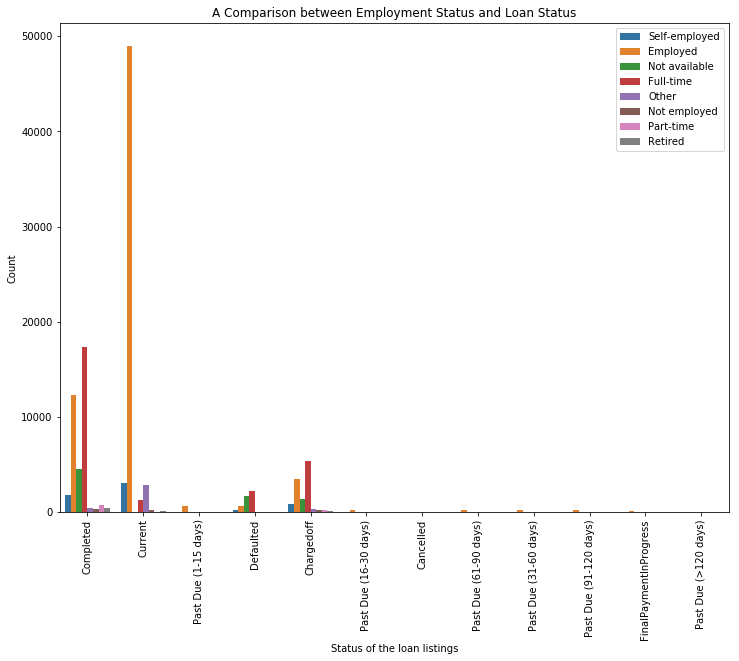

In [25]:
plt.figure(figsize=(12,9));
sb.countplot(data= df_loan, x= 'LoanStatus',hue= 'EmploymentStatus');#plotting the countplot
plt.xlabel('Status of the loan listings');#Labeling the x-axis
plt.ylabel('Count');#Labeling the y-axis
plt.xticks(rotation=90);#rotating the ticks for clarity
plt.legend(loc= 'upper right');
plt.title('A Comparison between Employment Status and Loan Status');

>For completed loans, people employed full time followed by employed are more. 
>For current loans, Employed  aee singnificantly more. It seems that self employed and the rest are not amenable to these loans.

## 5. How Are Employment Status and Annual Percentage Rate related?

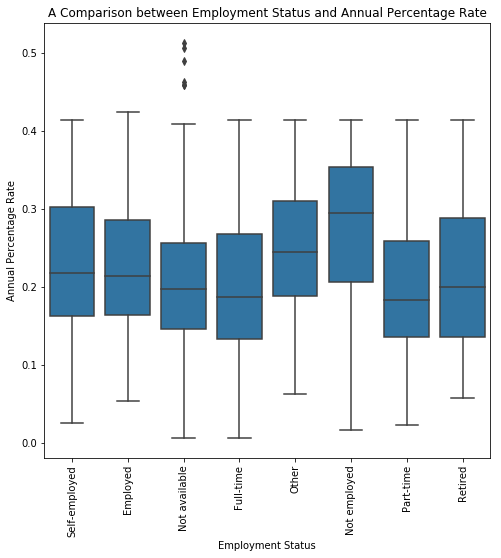

In [26]:
plt.figure(figsize=[8,8]);
base_color= sb.color_palette()[0];#setting up color
sb.boxplot(data= df_loan, x= 'EmploymentStatus',y= 'BorrowerAPR',color=base_color);#plotting the boxplot
plt.xlabel('Employment Status');#Labeling the x-axis
plt.ylabel('Annual Percentage Rate');#Labeling the y-axis
plt.xticks(rotation=90);#rotating the ticks for clarity
plt.title('A Comparison between Employment Status and Annual Percentage Rate');

Regarding maximum and minimum APR, there seem to be uniform distribution among the job categories. except for the outliers in the Not available group.However, unemployed people have APRs that within higher range. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> **loan Status vs Annual Percentage rate:** Borrowers who have completed their loans had the highest annual rate followed by those who defaulted. The completed loans has the list median and most of the rates are within the interquatile range (The completed loans seem to have favourable rates between the lowest and the upper quartile, the maximum not withstanding- could it be a reason for the borrowers paying up.

> The defaulted registered a narrower range and a higher median, suggesting higher rates than those that are completed. further, the current loans seem promising as the rates are more lesser for most of its data points.

>**loan Status vs Annual Percentage rate:** The defaulted and charged off loans show a significantly high rates, suggesting a possible reason for the failures to payback. The Current and Completed loans show more points within the IQR. The completed loans mostly so because we see rates as low as zero a possible incentive to borrow.

>**APR vs Interest Rate:** The APR and interest rate showed clear direct proportionality as expected.

>**Employment Status vs Loan Status** For completed loans,full time followed by employed are more. 
>For current loans, Employed  aee singnificantly more. It seems that self employed and the rest are not amenable to these loans.

>**Employment Status vs APR**: Regarding maximum and minimum APR, there seem to be uniform distribution among the job categories. except for the outliers in the Not available group.However, unemployed people have APRs that within higher range. 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> None

## Multivariate Exploration


## 1. What can you see between the Annual Percentage Rate vs Interest Rate and LenderYield

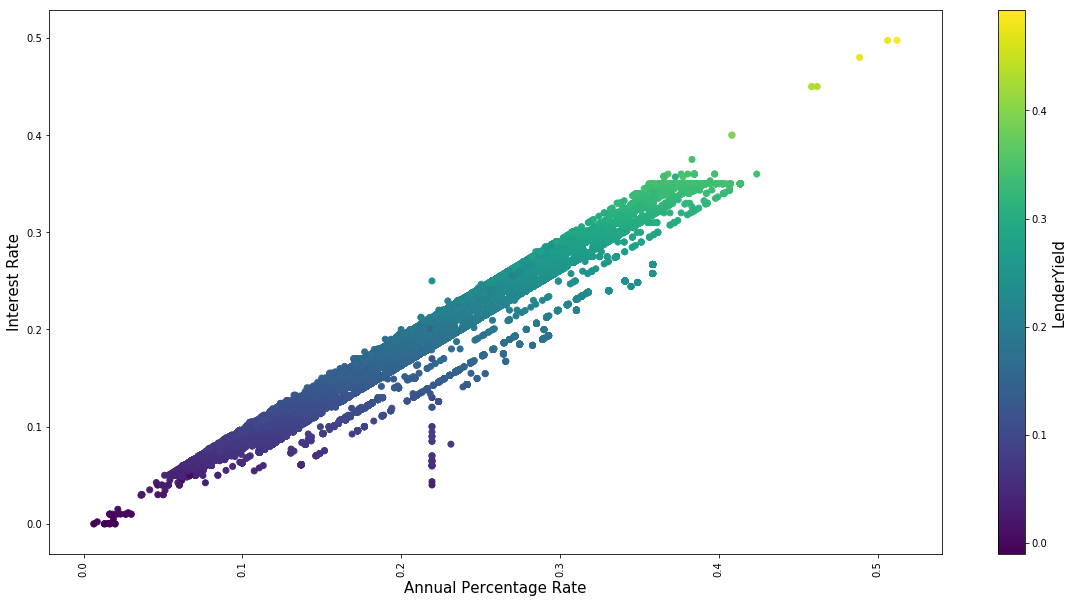

In [27]:

plt.figure(figsize=[20,10]);
plt.scatter(data= df_loan, x= 'BorrowerAPR',y= 'BorrowerRate',c = 'LenderYield',cmap='viridis');#plotting the boxplot
plt.xlabel('Annual Percentage Rate',fontdict={'fontsize':15});#Labeling the x-axis
plt.ylabel('Interest Rate',fontdict={'fontsize':15});#Labeling the y-axis
plt.xticks(rotation=90);#rotating the ticks for clarity
plt.colorbar().set_label('LenderYield',fontdict={'fontsize':15});


The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.
Here, there is a marked propornality among the three numerical variable. The color encoding for the third variable showed an upward progression as the rates increases. This is expected

## 2. Are Home owners likely to take loans with higher rates?

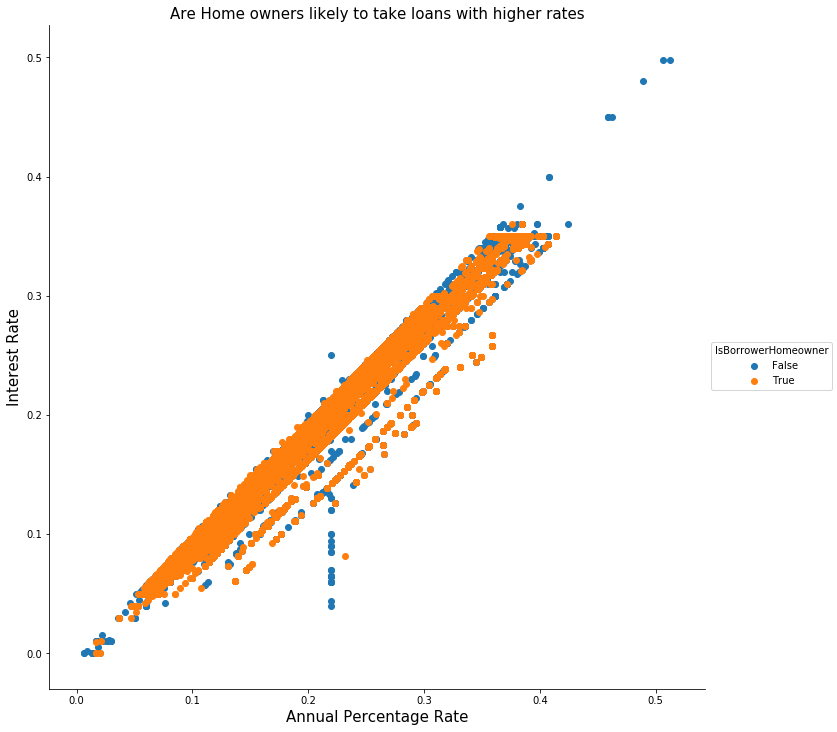

In [28]:

g= sb.FacetGrid(data=df_loan,hue= 'IsBorrowerHomeowner',size=10);# creating the facetgrid object
g.map(plt.scatter,'BorrowerAPR','BorrowerRate')# plotting the grid
g.add_legend()# adding legend
plt.xlabel('Annual Percentage Rate',fontdict={'fontsize':15})# the x-axis label
plt.ylabel('Interest Rate',fontdict={'fontsize':15})# the y-axis label
plt.title('Are Home owners likely to take loans with higher rates',fontdict={'fontsize':15});# the plot title

Except for few outliers on the data points that are not homeowners,there is no significant impact on the choice of loan rates by borrowers, based on whether one owns a house or not.

## 3.  Loan Status vs Interest Rate and  Employment status

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


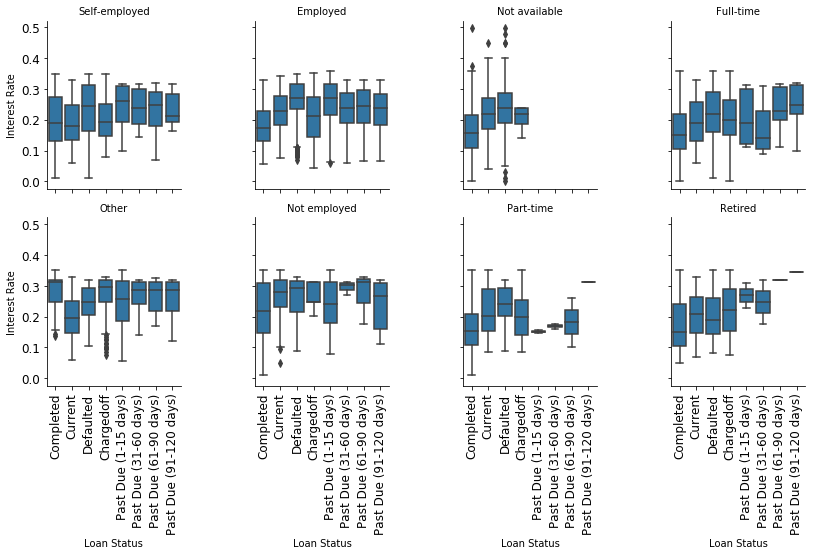

In [29]:
g= sb.FacetGrid(data=df_loan,col= 'EmploymentStatus',size=3,col_wrap=4,margin_titles=False);#creating the facetgrid object
g.map(sb.boxplot,'LoanStatus','BorrowerRate');# plotting the grid
g.set_axis_labels('Loan Status','Interest Rate'); #the axes label
g.set_titles(col_template='{col_name}',fontsize=50);# the plot title


# Set the font size of the tick labels
g.set_xticklabels(fontsize=12, rotation=90);
g.set_yticklabels(fontsize=12);




## 4. Loan Status vs Interest Rate and  Term

In [30]:
bins = [0,12,36,60]# creating bins 
labels = ['12-month', '36-month', '60-month']# the labels for the bins
df_loan['Term_cat'] = pd.cut(df_loan['Term'], bins=bins, labels=labels)#applying pd.cut to create a new feature


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


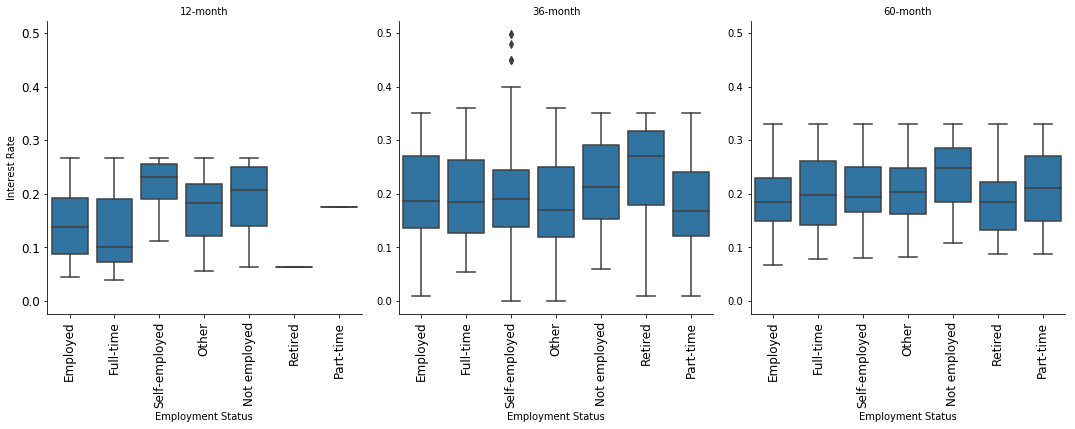

In [31]:

g= sb.FacetGrid(data=df_loan,col= 'Term_cat',size=5,margin_titles=False);#creating the facetgrid object
g= g.map(sb.boxplot,'EmploymentStatus','BorrowerRate');# plotting the grid
g.set_axis_labels('Employment Status','Interest Rate');# Labelling the axes
g.set_titles(col_template='{col_name}',fontsize=50);# setting the title


# Set the font size of the tick labels
g.set_xticklabels(fontsize=12, rotation=90);
g.set_yticklabels(fontsize=12);




### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In the multivariate plot of APR vs Interest Rate, we see that the application of a third variable LenderYield clearly brought out the direct proportionality of the initial variables of interest namely (APR and interest rate). The higher the two variables the more the profit from the loans to investors.this makes sense.

> The borrowers choice of loans where not influenced home ownership as seen in the second plot

> in the 3rd plot, self employed, fulltime, employed, part time and retired borrowers, tend to pick loans with low interest rates

> Finally, most of the job categories tend to take up the 36-month loans other the interest rates are a bit higher than the other two terms. Most of the job catetegories tend to take loans with terms of 36 and 60 months.
### Were there any interesting or surprising interactions between features?

> The interactions between the numerical variable were quite predictable: they were always linear and direct in proportion

## Conclusions


> From the analysis so far it is obvious the APR and interest rate affects the choice of loans borrowers take.

> More people in the employed category have more current loans and completed loans

> The employed and full time category are borrow more than the rest.

> Investors profit has strong correlation to the rates. This is expected.

> The steps taken considers the variables and their combination before choosing the plot type